In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [192]:
df= pd.read_csv('df_total.csv')
df

,Unnamed: 0,property_type,lat,lon,price_aprox_usd,surface_covered_in_m2,ciudad_barrio,sub_loc,distance_obelisco,precio_m2,segmento_precio_m2,segmento_precio_m2_ordinal
0,1,apartment,-34.652262,-58.522982,72000.000000,55.0,Mataderos,Mataderos,15988.570648,1309.090909,bajo,3
1,2,apartment,-38.002626,-57.549447,64000.000000,35.0,Mar del Plata,Centro,221376.145262,1828.571429,medio,6
2,4,apartment,-34.559873,-58.443362,138000.000000,40.0,Belgrano,Belgrano,7381.316759,3066.666667,alto,10
3,5,apartment,-34.559873,-58.443362,195000.000000,60.0,Belgrano,Belgrano,7381.316759,3000.000000,alto,10
4,6,apartment,-34.486019,-58.503814,115000.000000,36.0,San Isidro,Martínez,15299.501265,2948.717949,alto,9
...,...,...,...,...,...,...,...,...,...,...,...,...
94339,95625,store,-34.595772,-58.385802,381250.000000,122.0,Recoleta,Recoleta,736.643346,3125.000000,alto,10
94340,95657,store,-34.606977,-58.376367,426084.744167,287.0,NaN,Capital Federal,584.936148,1484.615833,medio,4
94341,95700,store,-34.649660,-58.383410,355000.000000,169.0,Barracas,Barracas,2596.027124,2100.591716,alto,7
94342,95741,store,-34.637014,-58.433177,210000.000000,403.0,NaN,Capital Federal,6039.195608,521.091811,bajo,1


In [193]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

# Baseline

In [194]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [195]:
price_mean = df.price_aprox_usd.mean()
price_mean

217695.84124253044

In [196]:
def error(ground_truth, prediction):

    r2 = r2_score(ground_truth, prediction)
    RMSE = mean_squared_error(ground_truth, prediction, squared= False)


    print('R2:' ,r2)
    print ('RMSE:' , round(RMSE))

    return r2, RMSE

In [197]:
price_mean = pd.Series([price_mean])

In [198]:
price_mean = price_mean.repeat(len(df.price_aprox_usd))
price_mean

0    217695.841243
0    217695.841243
0    217695.841243
0    217695.841243
0    217695.841243
         ...      
0    217695.841243
0    217695.841243
0    217695.841243
0    217695.841243
0    217695.841243
Length: 94344, dtype: float64

In [199]:
r2_mean, RMSE_mean = error(price_mean, df.price_aprox_usd)

R2: 0.0
RMSE: 216128


In [200]:
from sklearn.model_selection import cross_validate

In [201]:
def reg_lineal_simple(data, feature):

    X = data[[feature]]
    y = data.price_aprox_usd

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 7)

    lm = linear_model.LinearRegression()
    model = lm.fit(X, y)

    predictions = lm.predict(X_test)

    cv = cross_validate(estimator=linear_model.LinearRegression(), X=X_train, y=y_train, scoring = ['neg_root_mean_squared_error', 'r2'], cv=3)

    sns.scatterplot(data=data, x=feature, y="price_aprox_usd", hue= 'segmento_precio_m2')
    plt.plot(X_train, model.predict(X_train), color='red', linewidth=2)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    return cv

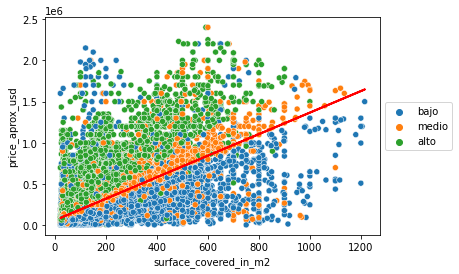

In [202]:
cv_tot = reg_lineal_simple(df, 'surface_covered_in_m2')

In [203]:
df_depto = df[df.property_type == 'apartment']
df_depto.sample(2)

,property_type,lat,lon,price_aprox_usd,surface_covered_in_m2,ciudad_barrio,sub_loc,distance_obelisco,precio_m2,segmento_precio_m2,segmento_precio_m2_ordinal
15481,apartment,-34.656676,-58.369553,80000.000000,56.0,Avellaneda,Avellaneda,3283.305232,1428.571429,medio,4
46684,apartment,-31.413500,-64.181050,284815.830713,250.0,Córdoba,Córdoba,668332.323874,1139.263323,bajo,3


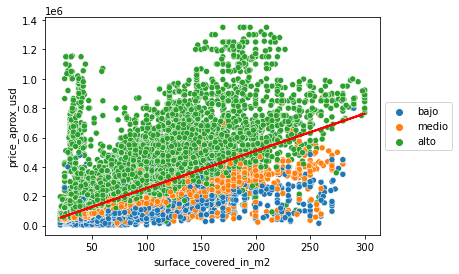

In [204]:
cv_depto=reg_lineal_simple(df_depto, 'surface_covered_in_m2')

In [205]:
df_casa = df[df.property_type == 'house']
df_casa.sample(2)

,property_type,lat,lon,price_aprox_usd,surface_covered_in_m2,ciudad_barrio,sub_loc,distance_obelisco,precio_m2,segmento_precio_m2,segmento_precio_m2_ordinal
60125,house,-34.589089,-58.558832,150000.0,168.0,General San Martín,San Martín,19769.124601,750.000000,bajo,2
61557,house,-34.478013,-58.577158,280000.0,199.0,San Fernando,San Fernando,23020.599334,1407.035176,medio,4


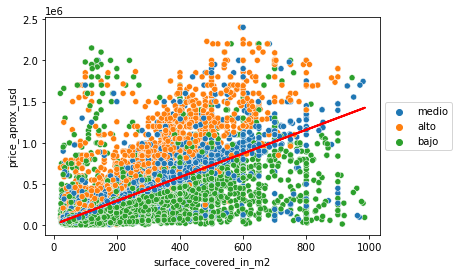

In [206]:
cv_casa = reg_lineal_simple(df_casa, 'surface_covered_in_m2')

In [207]:
df_store = df[df.property_type == 'store']
df_store.sample(2)

,property_type,lat,lon,price_aprox_usd,surface_covered_in_m2,ciudad_barrio,sub_loc,distance_obelisco,precio_m2,segmento_precio_m2,segmento_precio_m2_ordinal
93177,store,-34.755847,-58.400117,140000.000000,73.0,Lomas de Zamora,Lomas de Zamora,9037.454654,1917.808219,medio,7
94160,store,-35.979730,-62.744045,35510.204082,30.0,Trenque Lauquen,Trenque Lauquen,491856.160914,1183.673469,bajo,3


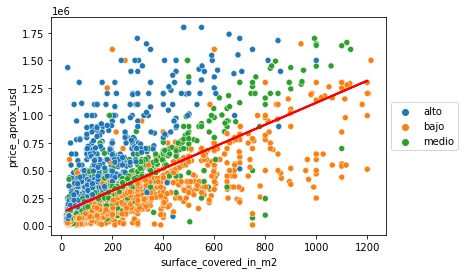

In [208]:
cv_store = reg_lineal_simple(df_store, 'surface_covered_in_m2')

In [209]:
df_ph = df[df.property_type == 'PH']
df_ph.sample(2)

,property_type,lat,lon,price_aprox_usd,surface_covered_in_m2,ciudad_barrio,sub_loc,distance_obelisco,precio_m2,segmento_precio_m2,segmento_precio_m2_ordinal
88172,PH,-34.625792,-58.405058,155000.0,85.0,San Cristobal,San Cristobal,2876.113429,2619.809322,alto,9
90252,PH,-34.510618,-58.477369,265000.0,90.0,Vicente López,Olivos,12023.956990,1558.823529,medio,5


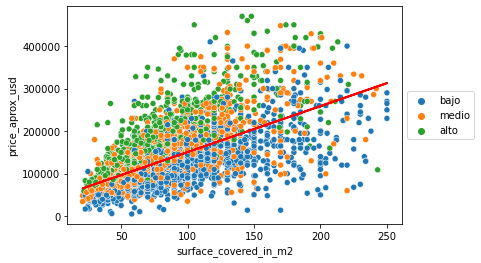

In [210]:
cv_ph = reg_lineal_simple(df_ph, 'surface_covered_in_m2')

In [212]:
rmse_dict = {'RMSE_ph' : cv_ph['test_neg_root_mean_squared_error'] , 'RMSE_casa':cv_casa['test_neg_root_mean_squared_error'], 'RMSE_depto':cv_depto['test_neg_root_mean_squared_error'], 'RMSE_store':cv_store['test_neg_root_mean_squared_error'], 'RMSE':cv_tot['test_neg_root_mean_squared_error'], 'RMSE promedio': RMSE_mean}

In [213]:
df_plot = pd.DataFrame(rmse_dict)

In [214]:
df_plot[['RMSE', 'RMSE_store','RMSE_casa', 'RMSE_depto', 'RMSE_ph']] = df_plot[['RMSE', 'RMSE_store','RMSE_casa', 'RMSE_depto', 'RMSE_ph']] * -1

<AxesSubplot:>

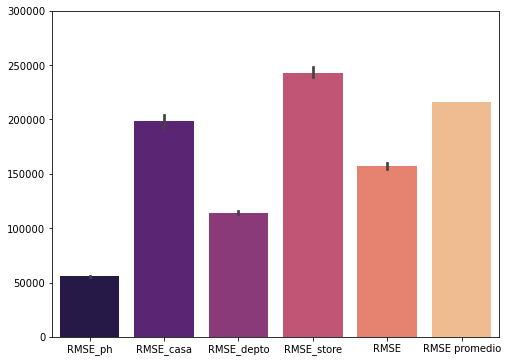

In [218]:
plt.figure(figsize=(8, 6))
plt.ylim(0, 300000)
sns.barplot(data=df_plot, palette= 'magma')

In [219]:
df_plot.to_csv('./data/RMSE_lineal_simple.csv', index=False)